Due Date: 30 Apr 2025 by 11:59 pm

Grading Rubric:

| Question | Points |
| ----- |---- |
| 1 | 10 |
| 2 | 10 |
| 3 | 10 |
| 4 | 10 |
| 5 | 20 |
| 6 | 10 |
| 7 | 10 |
| 8 | 10 |
| 9 | 10 |
| Total | 100 |

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Instructions: 

Submission: Please upload the notebook (.ipynb) file on D2L --> HW -- > HW04 --> HW04_Dropbox

1. The HW assignment is individual-based assignment. However, you are encouraged to discuss with your classmates, but DO NOT show your code and copy from others. It will be considered as plagiarism, and proper actions will be taken as per the syllabus.

2. Just because your question has passed the autograder test, doesn't mean necessarily that your answer is correct. So make sure you answer those questions carefully. The instructor has some hidden tests, and only when your question passes those tests successfully during grading, you will be given full points for the question.

3. If you are stuck somewhere, feel free to reach out to me. 

Objectives: To practice and learn about the following topics: 
1. Hypothesis Testing

# Examining Therapeautic Touch

Therapeutic touch (commonly shortened to `TT`), known by some as "non-contact therapeutic touch" claim promotes healing and reduces pain and anxiety. Practitioners of therapeutic touch state that by placing their hands on, or near, a patient, they are able to detect and manipulate what they say is the patient's energy field (HEF) and can massage it in order to promote health and relaxation in individuals. 

![Therapeautic Touch](https://th.bing.com/th/id/OIP.TXN-_fvGH4iEmbUrxW498AHaE6?rs=1&pid=ImgDetMain)


## Emily Rosa

Emily Rosa, a 4th grade student who was very familiar with the world of TT, decided to test whether or not TT practioners could truly interact with a person's HEF for her 4th grade science fair project. She later, at age nine, conceived and executed a scientific study of therapeautic touch which was published in the Journal of the American Medical Association in 1998. She is the youngest person to have a research paper published in a peer reviewed medical journal. 

### Emily's Experiment

Emily's experiment was clean, simple and effective. Due to her parent's occupations in the medical field, she has wide access to people who claimed to be TT practitioners. 

Emily tok 21 TT practitioners and used them for her science experiment. She would take a TT practitioner and ask them to extend their hands through a screen (which they can't see through). Emily would be on the other side and would flip a **fair coin**. Depending on how the coin landed, she would put out either her left hand or her right hand. The TT practitioner would then have to answer which hand Emily put out. If a practitioner could truly interact with a person's HEF, it would be expected that they answered correctly. 

Overall, through 210 samples, the practitioner picked the correct hand 44% of the time. 

<img src="https://scchen.com/en/post/if-emily-rosa-met-thomas-bayes/joc71352f1.gif" style="width:400px;"/>


Emily's main goal here was to text whether or not the TT practitioner's guesses were random, like the flip of a coin. In most medical experiments, this is the norm. We want to test whether or not the treatment has an effect, not whether or not the treatment actually works. 

We will now begin to formulate this experiment in terms of the steps of the hypothesis testing we learnt in this course. 

### Question 1: 
What is Emily's null hypothesis for how lily the TT practitioners are to choose the correct hand? What alternative hypothesis is she meant to discredit?  

Emily's null hypothesis is that the TT practitioners guesses were random and it is just by chance that 44% of the time, the TT practitioners were right. The TT practice do not have any significant impact on it's patients. 

The alternative hypothesis is that the observed data is not by chance, and there is some other reasons behind the practice of TT for such guesses. 

### Question 2: 

Remember that the practitioner got the correct answer 44% (0.44) of the time. According to Emily's null hypothesis, what proportion of times do we expect the practitioner to guess the correct hand and incorrect hand? 

Make sure your answer is a number between 0 and 1. 

In [2]:
pop_dist = np.array([0.5, 0.5]) # SOLUTION
pop_dist

array([0.5, 0.5])

The goal is to see if the difference from this true distribution is due to something other than chance. 

In [3]:
pop_dist.shape == (2,)

True

In [4]:
((0 < pop_dist[1] < 1) and (0 < pop_dist[0] < 1)).item() == True

True

### Question 3: 

We usually use a statistic to help determine which model the evidence points towards. What is a statistic that we can use to compare outcomes under Emily's null hypothesis model to what was observed? (Choose one)

1. The difference between the true distribution and the sample distribution
2. The sum of the absolute difference between the true distribution and the sample distribution divide by 2
3. The sum of the difference between the true distribution and the sample distribution

In [5]:
# Assign 1, 2 or 3 to your_choice variable
your_choice = 2 # SOLUTION
your_choice

2

In [6]:
(0 < your_choice < 4) == True

True

### Question 4:

Define the function `calculate_statistic` which takes in a sampled distribution and true distribution, and returns the value of the statistic chosen in Question 3. 

In [7]:
def calculate_statistic(dist1, dist2):
    statistic = np.sum(np.abs(dist1 - dist2)) / 2 # SOLUTION
    return np.round(statistic, 2)

In [8]:
calculate_statistic(np.array([0.5, 0.5]), np.array([0.4, 0.1])).item() == 0.25

True

In [9]:
calculate_statistic(np.array([0.4, 0.1]), np.array([0.4, 0.1])).item() == 0

True

### Question 5:

Assign `observed_statistic` to calculate the observed statistic from Emily's experiment. Round it upto two decimal points. 

In [10]:
sample_dist = np.array([0.44, 0.56]) # SOLUTION

observed_statistic = np.round(calculate_statistic(sample_dist, pop_dist), 2) # SOLUTION
observed_statistic

np.float64(0.06)

In [11]:
observed_statistic.item() == 0.06

True

### Question 6: 

To begin simulating, we should start by creating a representation of Emily's null model to use for our simulation. Complete the `one_simulation` function, which simulates one experiment, which consists of 210 hand choices, as Emily evaluated in real life and find a statistic to summarize this instance of simulation.  

In [12]:
def one_simulation():
    """# BEGIN PROMPT
    emp_dist = np.random.multinomial(n=..., pvals=...) / ... 
    """# END PROMPT
    sample_dist = np.random.multinomial(n=210, pvals=pop_dist) / 210 # SOLUTION NO PROMPT
    statistic = calculate_statistic(sample_dist, pop_dist) # SOLUTION
    return statistic

In [13]:
one_simulation()

np.float64(0.0)

In [14]:
(0 < one_simulation() < 1).item() == True

True

### Question 7: 

Let's now see what the distribution of the statistic is actuall like under Emily's null model. Complete the code given below to run the Emily's experiement for many repetitions and then plot the histogram of the distribution of the statistics. 

In [15]:
repetitions = 20000
total_statistics = []

for _ in np.arange(repetitions):
    ...
    statistic = one_simulation() # SOLUTION NO PROMPT
    total_statistics.append(statistic) # SOLUTION NO PROMPT

total_statistics = np.array(total_statistics)

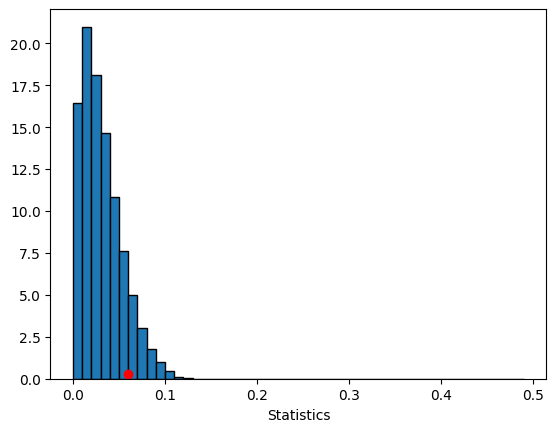

In [16]:
plt.hist(total_statistics, bins=np.arange(0, 0.5, 0.01), edgecolor='black', density=True)
plt.scatter(observed_statistic, 0.3, color='red')
plt.xlabel('Statistics')
plt.show()

We can make a visual argument as to whether we believe the observed statistic is consistent with Emily's model. Here, since large values of the test statistic suggest the alternative model (where the chance of getting the correct hand is something other than 50%), we can formalize our analysis by finding what proportion of simulated statistics were as large or larger than our observed statistic (the area at or to the right of the observed statistic). If this area is small enough (less than 5%), we'll declare that the observed data are inconsisted with our simulated model, and hence we reject the null hypothesis. 

### Question 8:

Calculate the p_value of the simulated statistics. In other words, find the percentage of entries of statistics in the histogram plot in Queston 8, that is greater than or equal to the observerd statistic. 

In [17]:
p_value = np.sum(total_statistics >= observed_statistic) / repetitions # SOLUTION
p_value

np.float64(0.1139)

In [18]:
(p_value > 0.05).item() == True

True

### Question 9: 

Make your final conclusion, of whether you should accept or reject the null hypothesis. 

We accept (fail to reject) the null hypothesis.